In [1]:
%matplotlib inline
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pylab as plt

In [313]:
def gen_cc_graph(n_components=10, cc_size=3):
    G = nx.Graph()
    for cmp in range(n_components):
        C = nx.dense_gnm_random_graph(cc_size, cc_size**2)
        edges = C.edges()
        edges = map(lambda e: (cc_size*cmp+e[0], cc_size*cmp+e[1]),edges)
        edges = list(edges)
        G.add_edges_from(edges)
    return G

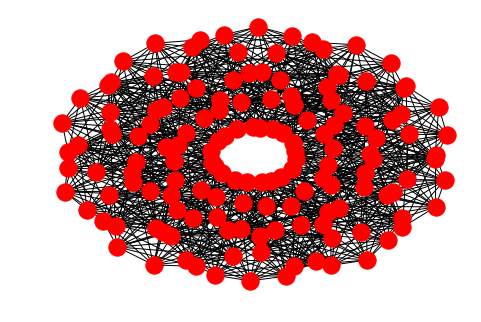

In [314]:
G = gen_cc_graph(n_components=10, cc_size=15)
nx.draw_kamada_kawai(G)

In [315]:
L = nx.normalized_laplacian_matrix(G)
L = L.toarray()
L

array([[ 1.        , -0.07142857, -0.07142857, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07142857,  1.        , -0.07142857, ...,  0.        ,
         0.        ,  0.        ],
       [-0.07142857, -0.07142857,  1.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  1.        ,
        -0.07142857, -0.07142857],
       [ 0.        ,  0.        ,  0.        , ..., -0.07142857,
         1.        , -0.07142857],
       [ 0.        ,  0.        ,  0.        , ..., -0.07142857,
        -0.07142857,  1.        ]])

In [178]:
from scipy.linalg import eig

In [179]:
ev, lv, rv = eig(L, left=True, right=True)

In [180]:
ev

array([ 3.00000000e+00+0.j, -1.11022302e-16+0.j,  3.00000000e+00+0.j,
        2.00000000e+00+0.j,  0.00000000e+00+0.j,  3.41421356e+00+0.j,
        2.00000000e+00+0.j,  9.23055176e-17+0.j,  5.85786438e-01+0.j])

In [153]:
rv

array([[ 0.81649658, -0.57735027,  0.30959441,  0.        ,  0.        ],
       [-0.40824829, -0.57735027, -0.80910101,  0.        ,  0.        ],
       [-0.40824829, -0.57735027,  0.49950661,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.70710678],
       [ 0.        ,  0.        ,  0.        , -0.70710678,  0.70710678]])

In [154]:
lv

array([[ 0.75552496, -0.57735027,  0.        ,  0.        ,  0.        ],
       [-0.6458791 , -0.57735027, -0.70710678,  0.        ,  0.        ],
       [-0.10964586, -0.57735027,  0.70710678,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.70710678,  0.70710678],
       [ 0.        ,  0.        ,  0.        , -0.70710678,  0.70710678]])

In [155]:
sorted(np.real(ev))

[-1.1102230246251565e-16, 0.0, 2.0, 2.9999999999999996, 2.9999999999999996]

In [156]:
-1.1102230246251565e-16 

-1.1102230246251565e-16

In [157]:
def adjust_eps(x, eps=0.0001):
    if x > -eps and x < eps:
        return 0
    return x

In [158]:
def process_eigs(ev, rv, eps=1e-10):
    

SyntaxError: unexpected EOF while parsing (<ipython-input-158-a9a0fa891114>, line 2)

In [159]:
t = list(zip(ev, rv))[0]

In [160]:
np.real(ev[0])

2.9999999999999996

In [161]:
ev = np.real(ev)
ev = list(map(adjust_eps, ev))
ev

[2.9999999999999996, 0, 2.9999999999999996, 2.0, 0]

In [162]:
z = zip(ev, rv)
sorted_eigs = sorted(z, key=lambda t: t[0])
sorted_eigs

[(0, array([-0.40824829, -0.57735027, -0.80910101,  0.        ,  0.        ])),
 (0, array([ 0.        ,  0.        ,  0.        , -0.70710678,  0.70710678])),
 (2.0, array([0.        , 0.        , 0.        , 0.70710678, 0.70710678])),
 (2.9999999999999996,
  array([ 0.81649658, -0.57735027,  0.30959441,  0.        ,  0.        ])),
 (2.9999999999999996,
  array([-0.40824829, -0.57735027,  0.49950661,  0.        ,  0.        ]))]

In [163]:
min_ev = min(ev)
new_evs = filter(lambda x: x != min_ev, sorted(ev))
l2 = list(new_evs)[0]

In [164]:
second_vector = list(filter(lambda t: t[0] == l2, sorted_eigs))[0]

In [165]:
second_vector

(2.0, array([0.        , 0.        , 0.        , 0.70710678, 0.70710678]))

In [283]:
def feidler_vector(G, eps=1e-10):
    L = nx.laplacian_matrix(G)
    L = L.toarray()
    ev, lv, rv = eig(L, left=True, right=True)
    ev = np.real(ev)
    ev = list(map(adjust_eps, ev))
    z = zip(ev, rv)
    sorted_eigs = sorted(z, key=lambda t: t[0])
    min_ev = min(ev)
    new_evs = filter(lambda x: x != min_ev, sorted(ev))
    l2 = list(new_evs)[0]
    second_vector = list(filter(lambda t: t[0] == l2, sorted_eigs))[0]
    return l2, second_vector

In [316]:
G = gen_cc_graph(n_components=100, cc_size=10)

In [317]:
second_value, second_vector = feidler_vector(G)

In [320]:
np.real(second_vector[1])

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.  

In [292]:
np.arange(len(second_vector[1]))[second_vector[1] > 0]

array([31, 32, 34, 35, 36, 37, 39])

In [ ]:
def partition(G, k):
    n, m = G.number_of_nodes(), G.number_of_edges()
    l2, x = feidler_vector(G)
    indices = np.arange(n)
    C1_nodes = indices[x <= 0]
    C2_nodes = indices[x > 0]
    if k == 2:
        

In [290]:
G.num()

132

In [312]:
for cc in nx.connected_components(G):
    print(cc)

{0, 1, 2, 3, 4, 5, 6, 8, 9}
{10, 11, 12, 13, 14, 15, 16, 17, 18}
{20, 21, 22, 23, 24, 26, 27, 28}
{34, 36, 30, 31}
{32, 33, 35, 37, 38, 39}
{40, 41, 42, 43, 44, 45, 46, 47, 48, 49}
{50, 51, 52, 53, 54, 55, 56, 57, 58}
{64, 65, 66, 67, 68, 69, 60, 61, 62, 63}
{70, 71, 73, 74, 75, 76, 77}
{72, 78}
{80, 81, 82, 83, 84, 86, 87, 88, 89}
{96, 97, 98, 99, 90, 91, 92, 93, 94}
{100, 101, 102, 103, 104, 105, 106, 107, 108}
{110, 111, 113, 114, 115, 116, 117, 118, 119}
{129, 120, 122, 123, 124, 125, 126, 127}
{130, 132, 133, 134, 135, 136, 137, 138}
{140, 141, 142, 143, 144, 145, 146, 147, 148, 149}
{150, 151, 152, 153, 154, 155, 157, 158, 159}
{160, 163, 164, 165, 166, 167, 168, 169}
{170, 171, 172, 173, 174, 175, 176, 177, 178, 179}
{180, 181, 182, 183, 185, 186, 187, 188}
{192, 193, 194, 195, 196, 197, 198, 199, 190, 191}
{200, 201, 202, 203, 205, 206, 207, 209}
{208, 204}
{210, 211, 212, 213, 214, 215, 216, 217, 219}
{224, 225, 226, 227, 228, 229, 220, 221, 222, 223}
{230, 231, 232, 233, 234,

SyntaxError: illegal target for annotation (<ipython-input-305-fb572e210018>, line 1)